# Basic 🧠
CAUTION ⚠️: Read [this example notebook](https://github.com/codingfisch/niftiview/blob/main/examples/1_image.ipynb) first. ALL there shown features also work with `NiftiImageGrid` instead of `NiftiImage`!

`NiftiImageGrid` loads multiple volumetric image and offers a `.get_image` method

In [1]:
from niftiview import NiftiImageGrid, ATLASES, TEMPLATES

template_filepaths = [TEMPLATES['ch2'], TEMPLATES['T1'],
                      TEMPLATES['mni152'], TEMPLATES['ch2']]
niigrid = NiftiImageGrid(template_filepaths)
im = niigrid.get_image(origin=[0, 0, 0], height=400, layout='sagittal++')
print(type(im))

<class 'PIL.Image.Image'>


`.get_image` returns a `PIL` Image. Let's show it!

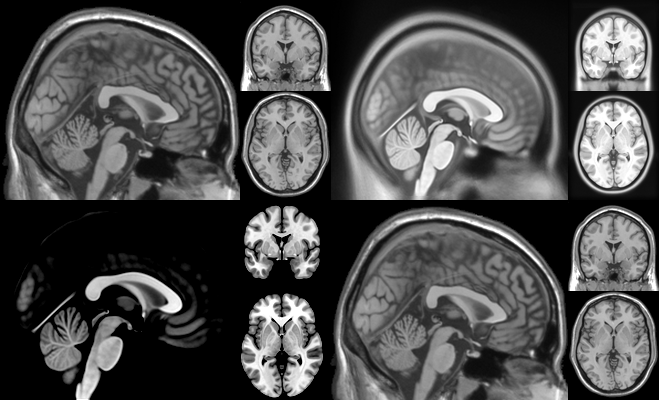

In [2]:
im  # in .py script use im.show() instead

CAUTION ⚠️: Read [this example notebook](https://github.com/codingfisch/niftiview/blob/main/examples/1_image.ipynb) first. ALL there shown features also work with `NiftiImageGrid` instead of `NiftiImage`!

## Image layers
To add masks to the images, pass a list of lists of filepaths to `NiftiImageGrid` 

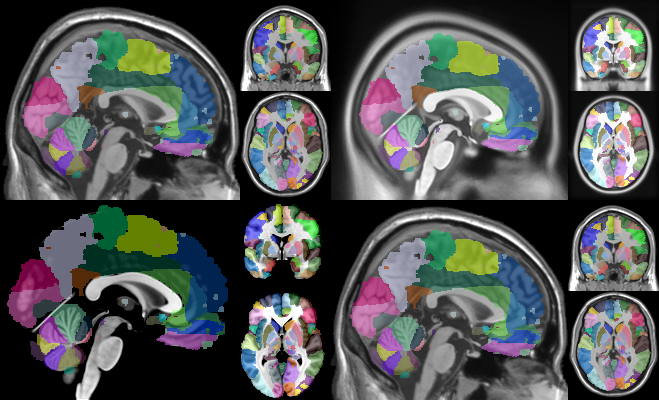

In [3]:
filepaths = [(TEMPLATES['ch2'], ATLASES['aal3']), (TEMPLATES['T1'], ATLASES['aal3']),
             (TEMPLATES['mni152'], ATLASES['aal3']), (TEMPLATES['ch2'], ATLASES['aal3'])]
niigrid = NiftiImageGrid(filepaths)
niigrid.get_image(height=400, layout='sagittal++')

## Nrows 🧩
Easily change the number of rows

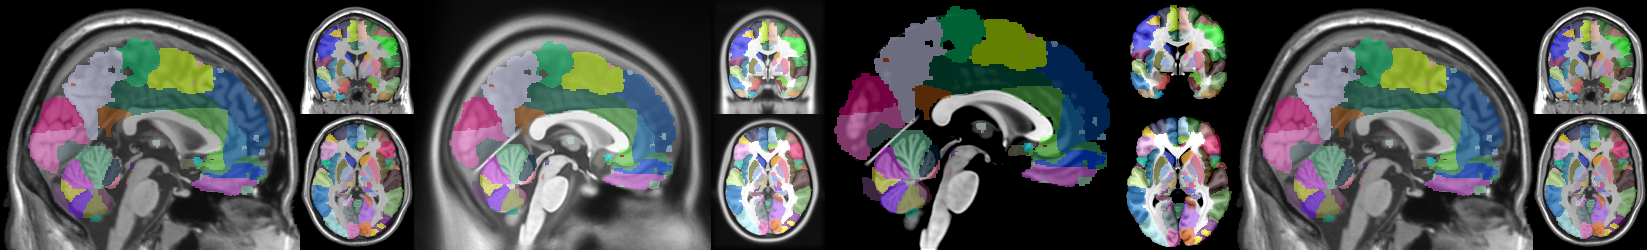

In [4]:
niigrid.get_image(height=250, layout='sagittal++', nrows=1)

## Squeeze 🤌
To understand the purpose of `squeeze`, first let's look at the following example

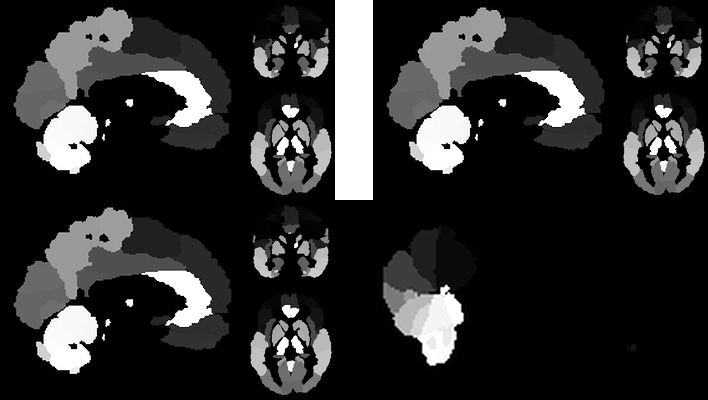

In [5]:
atlas_filepaths = [ATLASES['aal3'], ATLASES['aal3'],
                   ATLASES['aal3'], ATLASES['suit']]
niigrid = NiftiImageGrid(atlas_filepaths)
niigrid.get_image(height=400, layout='sagittal++', cbar_pad_color='white')

The ugly white patch is there to adapt the aspect ratio of the top right image to the bottom right image. Instead 

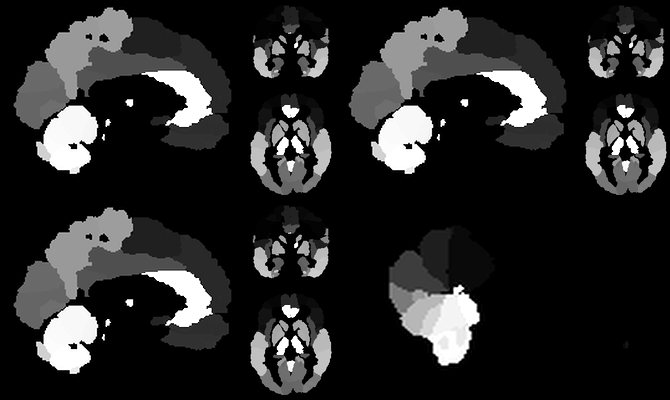

In [6]:
niigrid.get_image(height=400, layout='sagittal++', cbar_pad_color='white', squeeze=True)

uses the same (i.e. median) aspect ratio for all images!

## Speed 💨
`NiftiImageGrid.get_image` only takes ~20 milliseconds, enabling responsive interaction. Check it out by running the cell below!

In [7]:
from tqdm import tqdm

niigrid = NiftiImageGrid(filepaths)
images = []
for i in tqdm(range(-80, 80)):
    origin = (i, 0, 0)  # moving across sagittal axis
    im = niigrid.get_image(origin=origin, height=250, layout='sagittal++', is_atlas=[False, True])
    images.append(im)

100%|██████████| 160/160 [00:01<00:00, 83.36it/s]
